### Collect imdb dataset
We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
import numpy as np
import pandas as pd
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [4]:
train_data.shape,len(train_labels), test_data.shape, len(test_labels)

((25000,), 25000, (25000,), 25000)

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()


In [7]:
num_to_word_map = {num:word for word, num in word_index.items()}

Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [8]:
decode_review = ' '.join([num_to_word_map.get(i-3,'?') for i in train_data[10]])

In [9]:
decode_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

In [10]:
def vectorize_sequences(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for index, value in enumerate(sequence):
        results[index, value] = 1
    return results

In [11]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [12]:
# Building the model
from keras import layers
from keras import models
model = models.Sequential()
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

W0922 10:51:09.475866 4605920704 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 10:51:09.501990 4605920704 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 10:51:09.504304 4605920704 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
# compile the model
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics =['accuracy'])

W0922 10:51:09.561885 4605920704 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0922 10:51:09.566522 4605920704 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0922 10:51:09.570529 4605920704 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# validating our approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_val = train_labels[10000:]

In [15]:
history = model.fit(partial_x_train, partial_y_val, batch_size=512, epochs=10, validation_data=(x_val, y_val))

W0922 10:51:09.730987 4605920704 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 145us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/10
15000/15000 [==============================] - 1s 74us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/10
15000/15000 [==============================] - 1s 70us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/10
15000/15000 [==============================] - 1s 68us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/10
15000/15000 [==============================] - 1s 68us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/10
15000/15000 [==============================] - 1s 68us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/10
15000/15000 [==============================] - 1s 72us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

In [16]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

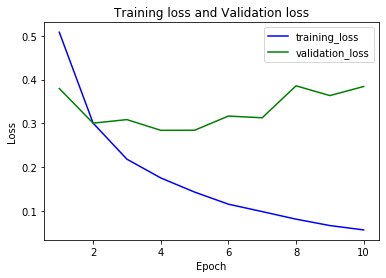

In [18]:
plt.plot(range(1,len(loss)+1), loss, 'b', label='training_loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'g', label='validation_loss')
plt.title('Training loss and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# what matters for us more is green line.

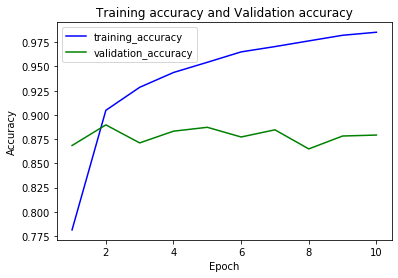

In [19]:
plt.plot(range(1, len(acc)+1), acc, 'b', label='training_accuracy')
plt.plot(range(1, len(val_acc)+1), val_acc, 'g', label='validation_accuracy')
plt.title('Training accuracy and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# what matters for us more is green line.

In [20]:
# Since our model is overfitted after epoch 4.
# we'll retrain out for 4 epoch, and will not use validation set this as we don't need validation now.
# i.e validation set is used to find the hyperparameters. and we have found one hyperparameter using val.data (epoch=4)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, train_labels, epochs=3, batch_size=512)
results = model.evaluate(x_test, test_labels)


Epoch 1/3
25000/25000 [==============================] - 2s 73us/step - loss: 0.4513 - acc: 0.8216
Epoch 2/3
25000/25000 [==============================] - 1s 46us/step - loss: 0.2634 - acc: 0.9102
Epoch 3/3
25000/25000 [==============================] - 2s 64us/step


This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, we should be able to get close to 95%.

In [21]:
results

[0.28029292748451234, 0.88884]

In [22]:
experimental_df = pd.DataFrame({'h_layer':[2,], 'h_neuron':[16,], 'activation':['relu'],
                                'epoch':[3,], 'batch_size':[512], 'test_acc':['88%']})

In [23]:
experimental_df

,h_layer,h_neuron,activation,epoch,batch_size,test_acc
0,2,16,relu,3,512,88%
